# Group Project-1 # Churn Prediction using Telcom service data.

Group-3 & members:
- Name (ID): Sai Sahas Elluru (0753808)
- Name (ID): Prashanth Nuthula (0753653)
- Name (ID): Siddharth Singh (0756590)
- Name (ID): Abhinav Sharma (0753639)
- Name (ID): Nishant Mahajan (0753638)

## Churn Prediction Analysis Part 1

#### Q. What is Churn Prediction analysis

In any business getting new customers is always a greater task, but it is comparatively easier to keep the old customer. Customer churn is when a customer stops using the service of any business for a long time or shifted to other services. Using churn prediction concept businesses or services can predict which customers are likely to leave the service and these service providers can provide special offers or benefits or loyalty cards to keep them. It is not only hard to get new customers onboard, it costs the service provider the revenue lost by the churned customers and resources put up to get new customers.

Churn prediction is a data driven and statistical approach using Machine learning algorithms. . We will do this using historical data of the customers who had left and study their characteristics as predictors. In ML models these predictors are applied on the current customers to recognize similar patterns and predict potential customers who are ready to churn.!

In [1]:
# Import all the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline


import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")

import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.subplots as sp #visualization
import plotly.figure_factory as ff#visualization


In [2]:
from pycaret.utils import enable_colab
enable_colab()


Colab mode activated.


## Data Import
- Telecom Churn Data

In [3]:
import os

telcom = pd.read_csv("Telco-Customer-Churn.csv")

## Data Overview

In [4]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
print ("Rows     : " ,telcom.shape[0])
print ("Columns  : " ,telcom.shape[1])
print ("\nFeatures : \n" ,telcom.columns.tolist())
print ("\nUnique values :  \n",telcom.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [6]:
telcom.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
telcom = telcom.replace(" ", np.NaN)
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
telcom.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# Data Cleaning

We will keep 20 input variables and 1 output variable (Churn) to create the model
- customerID (Char w/ 7043 levels "0002-ORFBO","0003-MKNFE",)
- gender (Factor w/ 2 levels "Female","Male")
- SeniorCitizen (int)
- Partner (Factor w/ 2 levels "No","Yes")
- Dependents (Factor w/ 2 levels "No","Yes")
- tenure (int)
- PhoneService (Factor w/ 2 levels "No","Yes")
- MultipleLines (Factor w/ 3 levels "No","No phone service",)
- InternetService (Factor w/ 3 levels "DSL","Fiber optic",)
- OnlineSecurity (Factor w/ 3 levels "No","No internet service",)
- OnlineBackup (Factor w/ 3 levels "No","No internet service",)
- DeviceProtection (Factor w/ 3 levels "No","No internet service",)
- TechSupport (Factor w/ 3 levels "No","No internet service",)
- StreamingTV (Factor w/ 3 levels "No","No internet service",)
- StreamingMovies (Factor w/ 3 levels "No","No internet service",)
- Contract (Factor w/ 3 levels "Month-to-month",)
- PaperlessBilling (Factor w/ 2 levels "No","Yes")
- PaymentMethod (Factor w/ 4 levels "Bank transfer (automatic)",)
- MonthlyCharges (num)
- TotalCharges (num)
- Churn (Factor w/ 2 levels "No","Yes")


In [9]:
missing_data = telcom.isnull()

In [10]:
# Count missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

customerID
False    7043
Name: customerID, dtype: int64

gender
False    7043
Name: gender, dtype: int64

SeniorCitizen
False    7043
Name: SeniorCitizen, dtype: int64

Partner
False    7043
Name: Partner, dtype: int64

Dependents
False    7043
Name: Dependents, dtype: int64

tenure
False    7043
Name: tenure, dtype: int64

PhoneService
False    7043
Name: PhoneService, dtype: int64

MultipleLines
False    7043
Name: MultipleLines, dtype: int64

InternetService
False    7043
Name: InternetService, dtype: int64

OnlineSecurity
False    7043
Name: OnlineSecurity, dtype: int64

OnlineBackup
False    7043
Name: OnlineBackup, dtype: int64

DeviceProtection
False    7043
Name: DeviceProtection, dtype: int64

TechSupport
False    7043
Name: TechSupport, dtype: int64

StreamingTV
False    7043
Name: StreamingTV, dtype: int64

StreamingMovies
False    7043
Name: StreamingMovies, dtype: int64

Contract
False    7043
Name: Contract, dtype: int64

PaperlessBilling
False    7043
Name: PaperlessBill

#### Work with the Total Charges Column

In [11]:
#Replacing spaces with null values in total charges column
telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan)

In [12]:
missing_data = telcom.isnull()

In [13]:
# Count missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

customerID
False    7043
Name: customerID, dtype: int64

gender
False    7043
Name: gender, dtype: int64

SeniorCitizen
False    7043
Name: SeniorCitizen, dtype: int64

Partner
False    7043
Name: Partner, dtype: int64

Dependents
False    7043
Name: Dependents, dtype: int64

tenure
False    7043
Name: tenure, dtype: int64

PhoneService
False    7043
Name: PhoneService, dtype: int64

MultipleLines
False    7043
Name: MultipleLines, dtype: int64

InternetService
False    7043
Name: InternetService, dtype: int64

OnlineSecurity
False    7043
Name: OnlineSecurity, dtype: int64

OnlineBackup
False    7043
Name: OnlineBackup, dtype: int64

DeviceProtection
False    7043
Name: DeviceProtection, dtype: int64

TechSupport
False    7043
Name: TechSupport, dtype: int64

StreamingTV
False    7043
Name: StreamingTV, dtype: int64

StreamingMovies
False    7043
Name: StreamingMovies, dtype: int64

Contract
False    7043
Name: Contract, dtype: int64

PaperlessBilling
False    7043
Name: PaperlessBill

In [14]:
#Dropping null values from total charges column which contain .15% missing data 
telcom = telcom[telcom["TotalCharges"].notnull()]
telcom = telcom.reset_index()[telcom.columns]

#convert to float type
telcom["TotalCharges"] = telcom["TotalCharges"].astype(float)

In [15]:
#Replace 'No internet service' to 'No' for the following 6 columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    telcom[i]  = telcom[i].replace({'No internet service' : 'No'})

In [16]:
#replace values in Senior Citizen column
telcom["SeniorCitizen"] = telcom["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [17]:
# Convert Tenure to categorical column
def tenure_lab(telcom) :
    
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"

telcom["tenure_group"] = telcom.apply(lambda telcom:tenure_lab(telcom),
                                      axis = 1)

In [18]:
telcom.tenure_group.unique()

array(['Tenure_0-12', 'Tenure_24-48', 'Tenure_12-24', 'Tenure_gt_60',
       'Tenure_48-60'], dtype=object)

In [19]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


#### Dependent Variable or Variable of Interest is Churn

In [20]:
#Separating churn and non churn customers

churn     = telcom[telcom["Churn"] == "Yes"]
not_churn = telcom[telcom["Churn"] == "No"]

In [21]:
print ('Customers who stayed', len(not_churn))
print ('Customers who left', len(churn))


Customers who stayed 5163
Customers who left 1869


In [22]:
#Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = telcom.keys().tolist()

In [23]:
cat_cols

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'tenure_group']

In [24]:
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()

In [25]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'tenure_group']

In [26]:
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]

In [27]:
Id_col

['customerID']

In [28]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'tenure_group']

In [29]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

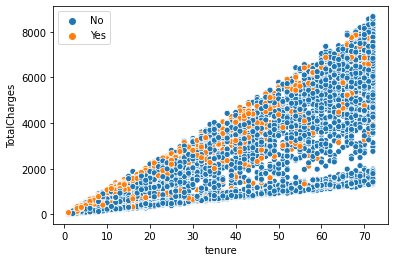

In [30]:
# Create a scatter plot

sns.scatterplot(data = telcom, x =telcom['tenure'], y = telcom['TotalCharges'], hue=telcom.Churn.tolist())

#### Q.What does the above plot indicate?

The scatter plot above describes the relationship between 2 numerical variables which are tenure(number of months customer has been with the service provider) and Total charges(charges for each customer till their tenure end). And the data points are divided according to the status of customer churn(Yes denotes customer left and vice a versa).  We can say there is a positive correlation between these 2 features i.e. as tenure increases total charges also increases. It seems that most of the customers who are churned are because of increase in total chargers as the their tenure increased. There are some customers who are churned even though their total charges is comparatively less and these customers might have left because of other reasons.

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

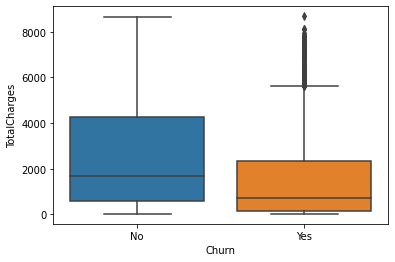

In [31]:
sns.boxplot(data= telcom, x="Churn", y="TotalCharges")

#### Q What does the above plot indicate?

The plot above indicates the Total charges vs Churn Rate. So, the boxplot over here are right skewed and there are outliers in the graph from where we can observe that as the Total charges are increasing the churn rate is also increasing.

# Exploratory Data Analysis
## Churn No-Churn Ratio
### You need to run the code below to create a Pie chart and understand the output

In [32]:
#labels
lab = telcom["Churn"].value_counts().keys().tolist()
#values
val = telcom["Churn"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Churn vs. Non-Churn",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)

py.iplot(fig)


#### Q. Comment on this distribution

The above pie plot gives us the information about percentage divide of the customers who are churned and who are not. From the dataset of 7043 customers 1869 (26.6%) customers had attrite from the Telcom service and 5163 (73.4%) customers have retained with their service.


In [33]:
data

[Pie({
     'hole': 0.5,
     'hoverinfo': 'label+value+text',
     'labels': [No, Yes],
     'marker': {'colors': ['royalblue', 'lime'], 'line': {'color': 'white', 'width': 1.3}},
     'rotation': 90,
     'values': [5163, 1869]
 })]

In [34]:
telcom['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

## Varibles distribution in Churn and Non-churn category: Pie Charts for Categorical variables
### You need to run the code and understand the output

In [35]:
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer Churn ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)
    


In [36]:
# for all categorical columns plot pie

for i in cat_cols :
    plot_pie(i)

#### Q. Comment on each and every chart. Is there any chart that does not make sense? 

### Gender Distribution
This pie plot gives the information about gender distribution of the customers who had left the service and who had not. Out of 5163 customers who retained with the service 50.7% are male and 49.3% are female. Our of 1869 customers who had attrite from the service 50.2% are female and 49.8% are male. By this we can say that gender has less affect on the customer churn and it cannot be the best predictor or behaviour or pattern to look for the potential churning customers.

### SeniorCitizen Distribution
This pie plot gives the information about Senior Citizen distribution of the customers who had left the service and who had not. Out of 5163 customers who retained with the service 87.1% are non senior citizen and 12.9% are Senior citizen. Out of 1869 customers who had attrite from the service 74.5% are not senior citizen and 25.5% are senior citizen. By this we can say that most of the customers who churned from the service are not senior citizen, but we should also look at the overall distribution senior citizen and non senior citizen category. The Telcom service provider should look to give benefits for the young and adult people and also give some offers for senior citizens.

### Partner Distribution
This pie plot gives the information about partner distribution of the customers who had left the service and who had not. Out of 5163 customers who retained with the service 47.2% does not have partner and 52.8% have partners. Out of 1869 customers who had attrite from the service 64.2% does not have partner and 35.8% have partners. This says that most of the customers who had left the service does not have partner account. Telcom service should give a look at charges for customer's accounts without partner.

### Dependants Distribution
This pie plot gives the information about dependants distribution of the customers who had left the service and who had not. Out of 5163 customers who retained with the service, 65.7% does not have dependant account and 34.3% have dependant accounts. Out of 1869 customers who had attrite from the service 82.6% does not have dependant account and 17.4% have dependant accounts. This tells us that Telcom services should give some benefits for the customers without dependant accounts.

### Phone Services Distribution
This pie plot gives the information about phone services distribution of the customers who had left the service and who had not. Out of 5163 customers who retained with the service, 90.1% uses phone services and the other don't. Out of 1869 customers who had attrite from the service 90.9 used the phone services and the rest don't. This information is useless.

### Multiple Lines Distribution
The pie plot above stats that 45.5% of the churn customers and 41% of the non churn customers have the multiline distributions. Again, the churn customers are more affected by the multiline distribution. Therefore, we can work on the multiline distribution to stop the churn rate.

### Internet Services Distribution
Out of 5163 customers who retained with the service, 34.8% uses fiberoptic and 37.9% uses DSL and rest don't use internet. Out of 1869 customers who had attrite from the service 69.4% used fiberoptic and 24.6% used DSL and rest were not using internet. By this we can say that most of the people who left the services were using fiberoptic.

### Online Security Distribution
Out of 5163 customers who retained with the service, 33.3% have online security and the rest don't. Out of 1869 customers who had attrite from the service, 15.8% had online security and rest don't. By this we can say that very less proportion of population cared about online security who left the services.

### Online Backup
Out of 5163 customers who retained with the service, 36.8% have online backup and the rest don't. Out of 1869 customers who had attrite from the service, 28% had online backup and rest don't. 

### Device Protection 
Out of 5163 customers who retained with the service, 36.3% have device protection and the rest don't. Out of 1869 customers who had attrite from the service, 29.2% had the device protection and the rest don't. Distribution is more or less similar.

### Streaming TV
Out of 5163 customers who retained with the service, 36.6% have tv services and rest don't. Out of 1869 customers who had attrite from the service, 43.6% have tv services and the rest don't. Users who left the services were into TV streaming services, if we could make them an offer regarding TV that they can't refuse, we can get those users back.

### Tech Support 
Out of 5163 customers who retained with the service, 33.5% have tech support and rest don't. Out of 1869 customers who had attrite from the service, 16.6% had tech support and rest don't. Users don't really care about tech support who left the services.

### Streaming Movies
As we can see in the pie chart, 43.8% of the churn customers have streaming movies and 37.1% of the non- churn customers have this subriptions. Hence, the churn customers are more likely affected by the streaming movies

### Contract Distribution
Out of 5163 customers who retained with the service, 43% have month to month and 31.7% have 2 year and rest 1 year. Out of 1869 customers who had attrite from the service, 88% had month to month and 2.5% had two year and rest 1 year. 

### Paperless Billing
Out of 5163 customers who retained with the service, 53.5% have paperless billing and rest don't. Out of 1869 customers who had attrite from the service, 74.9% have paperless billing and rest don't.

### Payment Method
Out of 5163 customers who retained with the service, every category has almost equal proportion of percentage. Out of 1869 customers who had attrite from the service, electronic check has the highest proportion.

### Tenure Group
Out of 5163 customers who retained with the service, age group 24 to 48 and age group > 60 has the highest and equal tenure period. Out of 1869 customers who had attrite from the service.

Every chart is providing some information, but not every chart gives the feature importance against the churn.

## Varibles distribution in Churn and Non-churn category: Histograms for Numerical variables
### You need to run the code and understand the output



In [37]:

#function  for histogram for customer attrition types
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer Churn ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

In [38]:
#for all categorical columns plot histogram    
for i in num_cols :
    histogram(i)
plt.show()

#### Q. Comment on each and every chart. Is there any chart that does not make sense?

## tenure distribution in customer churn
churn customers decreases as the tenure increases we can see that intially churn customers is 20% when the tenure is 0 and coming to non churn customers it is flucating between 0 to 5% for the tenure of 0 to 70, the non chrun customers reached peak point at the 72 month.

## Monthlycharges distribution in customer Churn
the non churn customers are more for charges 0 to 25, but interestingly the non churn customers decerased from 25 to 45 and from 45 to 105 charges the non chrurn customers are not constant they are fluctuating, the churn customers are more for the montly charges of 75 to 105 and between 0 to 70 the churn customers percent is less.

## Total charges distribution in customer churn
as the total charges increases the percent of churn and non churn customers decreases.


## Scatter Plot for Numerical variables
### You need to run the code and understand the output


In [39]:
#function  for scatter plot matrix  for numerical columns in data
def scatter_matrix(df)  :
    
    df  = df.sort_values(by = "Churn" ,ascending = True)
    classes = df["Churn"].unique().tolist()
    classes
    
    class_code  = {classes[k] : k for k in range(2)}
    class_code

    color_vals = [class_code[cl] for cl in df["Churn"]]
    color_vals

    pl_colorscale = "Portland"

    pl_colorscale

    text = [df.loc[k,"Churn"] for k in range(len(df))]
    text

    trace = go.Splom(dimensions = [dict(label  = "tenure",
                                       values = df["tenure"]),
                                  dict(label  = 'MonthlyCharges',
                                       values = df['MonthlyCharges']),
                                  dict(label  = 'TotalCharges',
                                       values = df['TotalCharges'])],
                     text = text,
                     marker = dict(color = color_vals,
                                   colorscale = pl_colorscale,
                                   size = 3,
                                   showscale = False,
                                   line = dict(width = .1,
                                               color='rgb(230,230,230)'
                                              )
                                  )
                    )
    axis = dict(showline  = True,
                zeroline  = False,
                gridcolor = "#fff",
                ticklen   = 4
               )
    
    layout = go.Layout(dict(title  = 
                            "Scatter plot matrix for Numerical columns for customer churn",
                            autosize = False,
                            height = 800,
                            width  = 800,
                            dragmode = "select",
                            hovermode = "closest",
                            plot_bgcolor  = 'rgba(240,240,240, 0.95)',
                            xaxis1 = dict(axis),
                            yaxis1 = dict(axis),
                            xaxis2 = dict(axis),
                            yaxis2 = dict(axis),
                            xaxis3 = dict(axis),
                            yaxis3 = dict(axis),
                           )
                      )
    data   = [trace]
    fig = go.Figure(data = data,layout = layout )
    py.iplot(fig)

In [40]:
#scatter plot matrix
scatter_matrix(telcom)

# Data Pre-Processing


In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


#customer id col
Id_col     = ['customerID']
#Target columns
target_col = ["Churn"]
#categorical columns
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]

#Binary columns with 2 values
bin_cols   = telcom.nunique()[telcom.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]



In [42]:
multi_cols

['MultipleLines',
 'InternetService',
 'Contract',
 'PaymentMethod',
 'tenure_group']

In [43]:
#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    telcom[i] = le.fit_transform(telcom[i])
    
#Duplicating columns for multi value columns
telcom = pd.get_dummies(data = telcom,columns = multi_cols)







In [44]:
telcom

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,5575-GNVDE,1,0,0,0,34,1,1,0,1,...,0,0,0,0,1,0,0,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,1,1,0,...,0,0,0,0,1,1,0,0,0,0
3,7795-CFOCW,1,0,0,0,45,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,1,0,1,1,24,1,1,0,1,...,0,0,0,0,1,0,1,0,0,0
7028,2234-XADUH,0,0,1,1,72,1,0,1,1,...,0,0,1,0,0,0,0,0,0,1
7029,4801-JZAZL,0,0,1,1,11,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
7030,8361-LTMKD,1,1,1,0,4,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [45]:
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [46]:
scaled

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457
...,...,...,...
7027,-0.343137,0.664868,-0.129180
7028,1.612573,1.276493,2.241056
7029,-0.872808,-1.170004,-0.854514
7030,-1.158016,0.319168,-0.872095


In [47]:
#df_telcom_og

In [48]:
telcom = telcom.drop(columns = num_cols,axis = 1)
telcom = telcom.merge(scaled,left_index=True,right_index=True,how = "left")

### What is the purpose of the above code?

Generally, Machine Learning models compute the distance between 2 data points using Euclidean distance. So, the algorithm favours the feature with bigger range, when the magnitude of one feature is high compare to other. So we used standard scaler method to scale the numeric columns in our dataset, then using the above codes we dropped the original numerical columns and merged the new scaled numerical columns to the left in the dataset. 

In [49]:
telcom

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,1,1,0,0,...,0,1,1,0,0,0,0,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,1,0,1,1,...,0,0,0,0,1,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,-1.239504,0.196178,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,1,0,1,1,1,1,0,1,1,...,0,1,0,1,0,0,0,-0.343137,0.664868,-0.129180
7028,2234-XADUH,0,0,1,1,1,0,1,1,0,...,0,0,0,0,0,0,1,1.612573,1.276493,2.241056
7029,4801-JZAZL,0,0,1,1,0,1,0,0,0,...,1,0,1,0,0,0,0,-0.872808,-1.170004,-0.854514
7030,8361-LTMKD,1,1,1,0,1,0,0,0,0,...,0,1,1,0,0,0,0,-1.158016,0.319168,-0.872095


In [50]:
summary = telcom.describe().transpose()
summary

,count,mean,std,min,25%,50%,75%,max
gender,7032.0,5.046928e-01,0.500014,0.000000,0.000000,1.000000,1.000000,1.000000
SeniorCitizen,7032.0,1.624005e-01,0.368844,0.000000,0.000000,0.000000,0.000000,1.000000
Partner,7032.0,4.825085e-01,0.499729,0.000000,0.000000,0.000000,1.000000,1.000000
Dependents,7032.0,2.984926e-01,0.457629,0.000000,0.000000,0.000000,1.000000,1.000000
PhoneService,7032.0,9.032992e-01,0.295571,0.000000,1.000000,1.000000,1.000000,1.000000
OnlineSecurity,7032.0,2.865472e-01,0.452180,0.000000,0.000000,0.000000,1.000000,1.000000
OnlineBackup,7032.0,3.448521e-01,0.475354,0.000000,0.000000,0.000000,1.000000,1.000000
DeviceProtection,7032.0,3.438567e-01,0.475028,0.000000,0.000000,0.000000,1.000000,1.000000
TechSupport,7032.0,2.901024e-01,0.453842,0.000000,0.000000,0.000000,1.000000,1.000000
StreamingTV,7032.0,3.843857e-01,0.486484,0.000000,0.000000,0.000000,1.000000,1.000000


## Variable Summary

In [51]:
# To make it look nice we can do some additional stuff if needed
summary = (telcom[[i for i in telcom.columns if i not in Id_col]].
           describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]

trace  = go.Table(header = dict(values = summary.columns.tolist(),
                                line = dict(color = ['#506784']),
                                fill = dict(color = ['#119DFF']),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['#506784']),
                                fill = dict(color = ["lightgrey",'#F5F8FF'])
                               ),
                  columnwidth = [200,60,100,100,60,60,80,80,80])
layout = go.Layout(dict(title = "Variable Summary"))
figure = go.Figure(data=[trace],layout=layout)
py.iplot(figure)

In [52]:
#correlation
correlation = telcom.corr()
#tick labels
matrix_cols = correlation.columns.tolist()

In [53]:
#convert to array
corr_array  = np.array(correlation)

In [54]:
correlation

,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
gender,1.000000,-0.001819,-0.001379,0.010349,-0.007515,-0.016328,-0.013093,-0.000807,-0.008507,-0.007124,...,0.000844,0.013199,-0.001050,-0.000649,-0.010516,-0.004319,0.016279,0.005285,-0.013779,0.000048
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.008392,-0.038576,0.066663,0.059514,-0.060577,0.105445,...,0.171322,-0.152987,-0.027713,0.001860,0.020383,0.014186,-0.002407,0.015683,0.219874,0.102411
Partner,-0.001379,0.016957,1.000000,0.452269,0.018397,0.143346,0.141849,0.153556,0.120206,0.124483,...,-0.083207,-0.096948,-0.305061,-0.048481,0.028468,0.105341,0.280353,0.381912,0.097825,0.319072
Dependents,0.010349,-0.210550,0.452269,1.000000,-0.001078,0.080786,0.023639,0.013900,0.063053,-0.016499,...,-0.149274,0.056448,-0.145379,-0.001459,0.024645,0.031419,0.118090,0.163386,-0.112343,0.064653
PhoneService,-0.007515,0.008392,0.018397,-0.001078,1.000000,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,...,0.002747,-0.004463,-0.006950,0.012307,-0.014778,-0.009750,0.020516,0.007877,0.248033,0.113008
OnlineSecurity,-0.016328,-0.038576,0.143346,0.080786,-0.091676,1.000000,0.283285,0.274875,0.354458,0.175514,...,-0.112295,-0.079918,-0.242409,-0.055662,0.007695,0.071663,0.263228,0.328297,0.296447,0.412619
OnlineBackup,-0.013093,0.066663,0.141849,0.023639,-0.052133,0.283285,1.000000,0.303058,0.293705,0.281601,...,-0.000364,-0.174075,-0.267366,-0.084081,0.023085,0.099192,0.278788,0.361138,0.441529,0.510100
DeviceProtection,-0.000807,0.059514,0.153556,0.013900,-0.070076,0.274875,0.303058,1.000000,0.332850,0.389924,...,-0.003308,-0.187325,-0.273920,-0.077332,0.044972,0.076854,0.275537,0.361520,0.482607,0.522881
TechSupport,-0.008507,-0.060577,0.120206,0.063053,-0.095138,0.354458,0.293705,0.332850,1.000000,0.277549,...,-0.114807,-0.084631,-0.238628,-0.072019,0.022137,0.062710,0.265396,0.325288,0.338301,0.432868
StreamingTV,-0.007124,0.105445,0.124483,-0.016499,-0.021383,0.175514,0.281601,0.389924,0.277549,1.000000,...,0.144747,-0.247712,-0.220761,-0.050234,0.028829,0.087969,0.198150,0.280264,0.629668,0.515709


In [55]:
#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

#### Q. What do you observe?

Corelation matrix heat map generally explains how strong the relation between any 2 variables or features in a dataset. As the value tends to +1 then there is a strong positive relation. If value tends to 0 then there is no linear relation between those variables. Finally if the value tends to -1 then there negative relation between those features.

Highly related variables are:
- Internet Services and monthly charges 
- total charges and tenure
- MultiLineService and Phone Services (Perfect Negative Correlation)

and many more.

## Model Building (We will build Decision Tree and Logistics Regression models)

In [56]:
# Separate the features from the class label and split the dataset into training and testing sets

In [57]:
# Import all the modules

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score

In [58]:
#splitting train and test data 
train,test = train_test_split(telcom,test_size = .25 ,random_state = 111)

### Q. What is the purpose of random_state parameter?

Random state is used to set the seed while splitting the data into train and test datasets. This ensures that the split which is generated is reproducible. If we do not specify random state we will end up getting different results every time we run the split code and further different accuracies.

In [59]:
##seperating dependent and independent variables
cols    = [i for i in telcom.columns if i not in Id_col + target_col]
X_train = train[cols]
Y_train = train[target_col]
X_test  = test[cols]
Y_test  = test[target_col]

## Logistics Regression

In [60]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [61]:
# Predicting test set
y_pred = classifier.predict(X_test)

In [62]:
classifier.coef_

array([[-0.08956517,  0.21558017,  0.00261894, -0.1320325 , -0.1786264 ,
        -0.42725061, -0.18892677, -0.00870754, -0.31126687,  0.17963548,
         0.25754599,  0.36799917, -0.27665425,  0.18276834,  0.09802785,
        -0.04404587,  0.65238894, -0.60420113,  0.72158809,  0.02814378,
        -0.74558993, -0.00908799, -0.1395194 ,  0.22585748, -0.07310815,
        -0.25144927, -0.65053012, -0.18549003,  0.54855039,  0.54306097,
        -1.37383624,  0.18818354,  0.24841282]])

In [63]:
#Evaluating the Results
cm = confusion_matrix(Y_test, y_pred)
acc_score = accuracy_score(Y_test, y_pred)
pre_score = precision_score(Y_test, y_pred)
rec_score = recall_score(Y_test, y_pred)
f1score = f1_score(Y_test, y_pred)

In [107]:
print(cm)
print()
print("accuracy is ", acc_score)
print()
print("Precision is ", pre_score)
print()
print("Recall is ", rec_score)
print()
print("f1_Score is", f1score)

[[1166  102]
 [ 262  228]]

accuracy is  0.8020477815699659

Precision is  0.6888297872340425

Recall is  0.5285714285714286

f1_Score is 0.5981524249422633


###  Q. What do the scores mean? Is this a good model fit based on the scores. Make sure you print all the scores.

Accuracy: It is the ratio of number of correct predictions over number of input samples. 
                        
(TP+TN)/(TP+FP+TN+FN). The score for this model is 80%, which is average for accuracy.

Precision: It is the ratio of correctly predicted true positives over total positive predictions.

TP/(TP+FP). Precision is also very low for this model 68%.

Recall: It is the ratio of correctly predicted true positives over observations in the real class.

TP/(TP+FN). Recall should be high but our model has only 52%

F1 Score: It is the weighted average of precision and recall.

(2∗Recall∗Precision)/(Recall+Precision). Finally f1_score should be high but or model has only 59%

Logistic Regression is a mediocre to predict the churn, because the accuracy is only 80% and For any model there shouldn't be more type 2 errors. For this model there are many type 2 errors which affects the prediction.

Test Data Accuracy: 0.8020


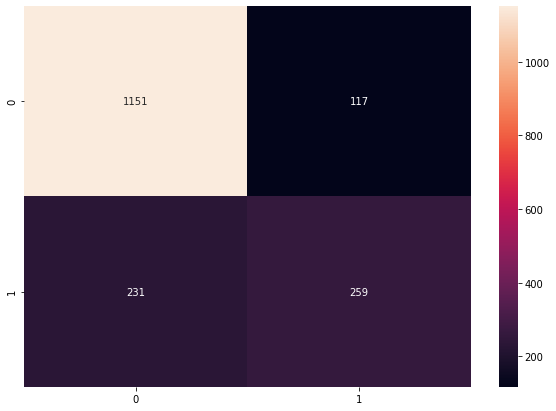

In [65]:
# Build the confusion matrix
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(Y_test, y_pred))

## Decision Tree

In [108]:
model_tree = DecisionTreeClassifier(random_state = 2)
model_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=2)

In [109]:
# Predicting test set
y_pred = model_tree.predict(X_test)

In [113]:
#Evaluating the Results
cm = confusion_matrix(Y_test, y_pred)
acc_score_d = accuracy_score(Y_test, y_pred)
pre_score_d=precision_score(Y_test, y_pred)
rec_score_d =recall_score(Y_test, y_pred)
f1score_d=f1_score(Y_test, y_pred)




In [114]:
print(cm)
print()
print("accuracy is ", acc_score_d)
print()
print("Precision is ", pre_score_d)
print()
print("Recall is ", rec_score_d)
print()
print("f1_Score is", f1score_d)

[[1046  222]
 [ 248  242]]

accuracy is  0.732650739476678

Precision is  0.521551724137931

Recall is  0.49387755102040815

f1_Score is 0.5073375262054507


###  Q. What do the scores mean? Is this a good model fit based on the scores. Make sure you print all the scores.

Accuracy: It is the ratio of number of correct predictions over number of input samples. 
                        
(TP+TN)/(TP+FP+TN+FN). The score for this model is 73%, which is very low for accuracy.

Precision: It is the ratio of correctly predicted true positives over total positive predictions.

TP/(TP+FP). Precision is also very low for this model 52%.

Recall: It is the ratio of correctly predicted true positives over observations in the real class.

TP/(TP+FN). Recall should be high but our model has only 49%

F1 Score: It is the weighted average of precision and recall.

(2∗Recall∗Precision)/(Recall+Precision). Finally f1_score should be high but or model has only 50%
No, this is not a good model because the accuracy is even less than Logistic Regression Model. Decision Tree is not suitable to predict CHurn.

Test Data Accuracy: 0.7327


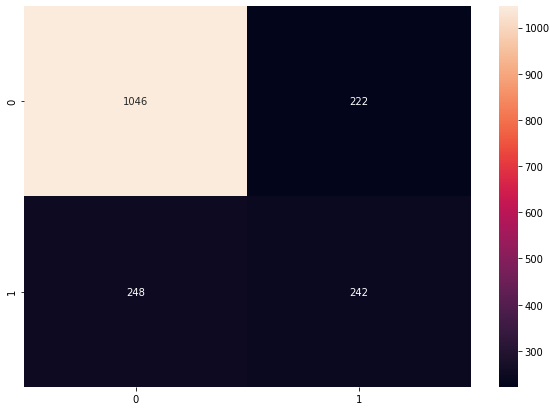

In [70]:
# Build Confusion Matrix

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(Y_test, y_pred))

 ### Q Which model performs better? (Hint: compare the metrics)


Logistic Regression performed better than Decision Trees. Except precision score, every other score is larger in Logistic Regression.

## K- fold Cross Validation

### Q. What is K-fold cross validation?

K-Fold cross validation is statistical method to split the dataset into train and test datasets without any biases. First it shuffles the dataset randomly and split it into specified number of groups i.e. value specified for k. For example if we give k value as 5, then the algorithm splits the dataset randomly into five groups. For the first iteration one group is kept for test and rest of the groups for training. This procedure is repeated for all the groups and we 5 different accuracies. This method ensures correct split if there is any bias. This also avoid overfitting of the machine learning model.

In [71]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= X_train, y =Y_train, cv =10)

In [72]:
# Check for accuracies
accuracies

array([0.80681818, 0.78219697, 0.82386364, 0.8219697 , 0.83301708,
       0.79316888, 0.78937381, 0.80075901, 0.80265655, 0.78937381])

In [73]:
accuracies.mean()

0.8043197630958542

### Q. What do accuracies tell?


CV accuracy is different from normal accuracy score. In cross val score we will get accuracy for each fold and the training and testing is different for each fold. We will take average of these accuracies for our final accuracy of the model. Since we used cv=10 here we have 10 different accuracies. BY performing cross val score we can be sure that there is no bias while training our model.

In [74]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train.columns, columns =["features"]), pd.DataFrame(np.transpose(classifier.coef_), 
                                                                              columns =["Coef"])], 
                                                                              axis = 1)

,features,Coef
0,gender,-0.089565
1,SeniorCitizen,0.215580
2,Partner,0.002619
3,Dependents,-0.132032
4,PhoneService,-0.178626
5,OnlineSecurity,-0.427251
6,OnlineBackup,-0.188927
7,DeviceProtection,-0.008708
8,TechSupport,-0.311267
9,StreamingTV,0.179635


## Feature Seclection/Feature Engineering

In [98]:
from sklearn.feature_selection import RFE 
classifier = LogisticRegression()
rfe = RFE(classifier, n_features_to_select=10, step=1)
rfe = rfe.fit(X_train, Y_train)

In [99]:
print(rfe.support_)

[False False False False False  True False False False False  True False
  True False False False  True  True  True False  True False False False
 False False False False  True  True  True False False]


In [100]:
X_train.columns[rfe.support_]

Index(['OnlineSecurity', 'StreamingMovies', 'MultipleLines_No',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_Two year',
       'tenure_group_Tenure_48-60', 'tenure_group_Tenure_gt_60', 'tenure'],
      dtype='object')

In [101]:
rfe.ranking_

array([18,  7, 24, 14, 15,  1, 11, 23,  5,  6,  1,  3,  1, 12, 16, 20,  1,
        1,  1, 21,  1, 22, 17,  4, 19,  8,  2,  9,  1,  1,  1, 13, 10])

In [102]:
# Build the model again after Feature Selection
classifier = LogisticRegression(random_state = 2)
classifier.fit(X_train[X_train.columns[rfe.support_]], Y_train)

LogisticRegression(random_state=2)

In [103]:
#Evaluating the Results
cm = confusion_matrix(Y_test, y_pred)
acc_score_r = accuracy_score(Y_test, y_pred)
pre_score_r = precision_score(Y_test, y_pred)
rec_score_r = recall_score(Y_test, y_pred)
f1_score_r = f1_score(Y_test, y_pred)

In [104]:
print(cm)
print()
print(acc_score_r)
print()
print(pre_score_r)
print()
print(rec_score_r)
print()
print(f1_score_r)

[[1166  102]
 [ 262  228]]

0.7929465301478953

0.6909090909090909

0.46530612244897956

0.5560975609756097


Test Data Accuracy: 0.7327


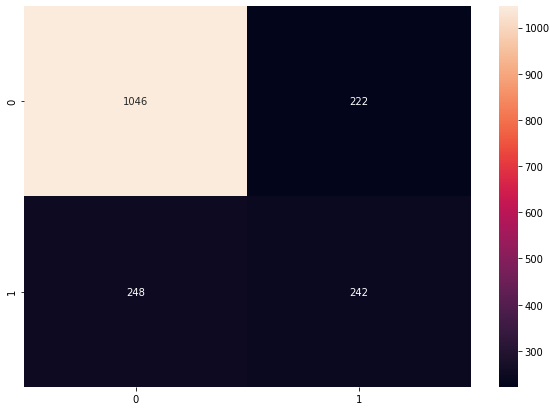

In [82]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(Y_test, y_pred))

### Q. Has the model improved after feature selection?

After implementing Reccursive feature elimination technique to eliminate the features whih are hampering the model performance, we got 10 best features which are important and relevant for prediction of churn. Using these 10 features we built the logistic regression model again. To a surprise the accuracy decreased after implementing rfe technique. Before feature selection the accuracy for logistic regeression was 80.32% and after feature selection the model accuracy is 73.2%.

In [83]:
# Subset the coefficents for RFE
pd.concat([pd.DataFrame(X_train.columns[rfe.support_], columns =["features"]), pd.DataFrame(np.transpose(classifier.coef_), 
                                                                              columns =["Coef"])], axis = 1)

,features,Coef
0,OnlineSecurity,-0.486838
1,StreamingMovies,0.485773
2,MultipleLines_No,-0.485659
3,InternetService_Fiber optic,1.091647
4,InternetService_No,-0.846112
5,Contract_Month-to-month,0.816328
6,Contract_Two year,-0.878728
7,tenure_group_Tenure_48-60,0.887878
8,tenure_group_Tenure_gt_60,0.914307
9,tenure,-1.177543


In [84]:
final_results = pd.concat([Y_test, telcom.customerID], axis =1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['customerID', 'Churn', 'predicted_churn']].reset_index(drop = True)

In [85]:
print(final_results)

      customerID  Churn  predicted_churn
0     3668-QPYBK    1.0                0
1     7795-CFOCW    0.0                1
2     9237-HQITU    1.0                0
3     8091-TTVAX    0.0                0
4     6865-JZNKO    0.0                1
...          ...    ...              ...
1753  2823-LKABH    0.0                1
1754  6894-LFHLY    1.0                0
1755  0639-TSIQW    1.0                0
1756  4801-JZAZL    0.0                0
1757  3186-AJIEK    0.0                0

[1758 rows x 3 columns]


### Q. Print the final Results

### Q. Provide recommendations based on the feature selection. What should company target for to reduce churn?

After feature selection we have got top 10 features which are most affecting our predictions. From these 10 features we then calculated classifier coefficient, which says if the value is positive then as the predictor variable increases, the response variable also increases and vice-a-versa. So, the telcom company should focus more on internet service fiber optic, contract month-month, tenure group greater than 60, and tenure group between 40 & 60. Because as these 5 predictor variable increases the response variable also increases. Concentrating on these features and planning how to control these instances would be recommended.

In [115]:
### Q Can you Add SVM 
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [116]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [117]:
#Evaluating the Results
cm = confusion_matrix(Y_test, y_pred)
acc_score_s=accuracy_score(Y_test, y_pred)
pre_score_s=precision_score(Y_test, y_pred)
rec_score_s=recall_score(Y_test, y_pred)
f1score_s=f1_score(Y_test, y_pred)

In [118]:
print(cm)
print()
print("accuracy is ", acc_score_s)
print()
print("Precision is ", pre_score_s)
print()
print("Recall is ", rec_score_s)
print()
print("f1_Score is", f1score_s)

[[1166  102]
 [ 262  228]]

accuracy is  0.7929465301478953

Precision is  0.6909090909090909

Recall is  0.46530612244897956

f1_Score is 0.5560975609756097


Test Data Accuracy: 0.7929


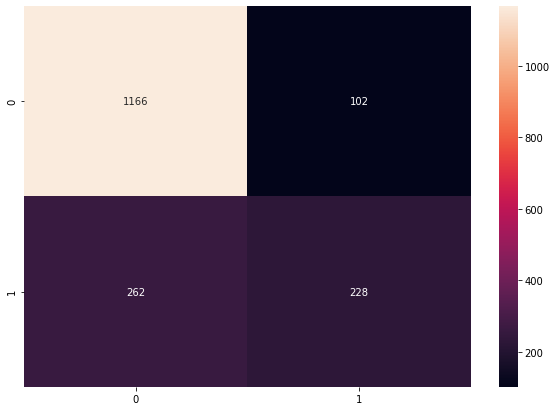

In [89]:
# Build Confusion Matrix

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(Y_test, y_pred))